In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

### Parte 1

#### Ejercicio 1

In [5]:
# Pasaje a coordenadas cromaticas: 

def rgb_to_chromatic(img: np.ndarray)->np.ndarray:
    chromatic_img = np.zeros_like(img)
    
    # Sum all rgb values
    sum_rgb = np.sum(img, axis=2)
    sum_rgb = sum_rgb.reshape((*sum_rgb.shape, 1))

    chromatic_img = np.where(sum_rgb != 0, img / sum_rgb, 0)
    
    result = chromatic_img*255

    return result.astype(np.uint8)


/tmp/ipykernel_11831/651891354.py:10: RuntimeWarning: invalid value encountered in divide
  chromatic_img = np.where(sum_rgb != 0, img / sum_rgb, 0)


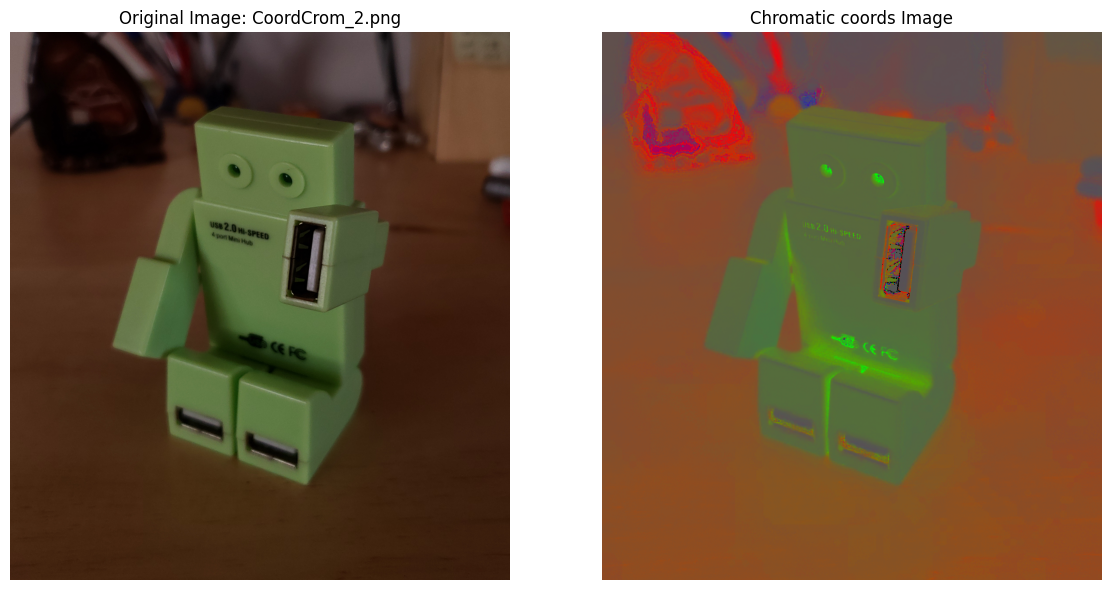

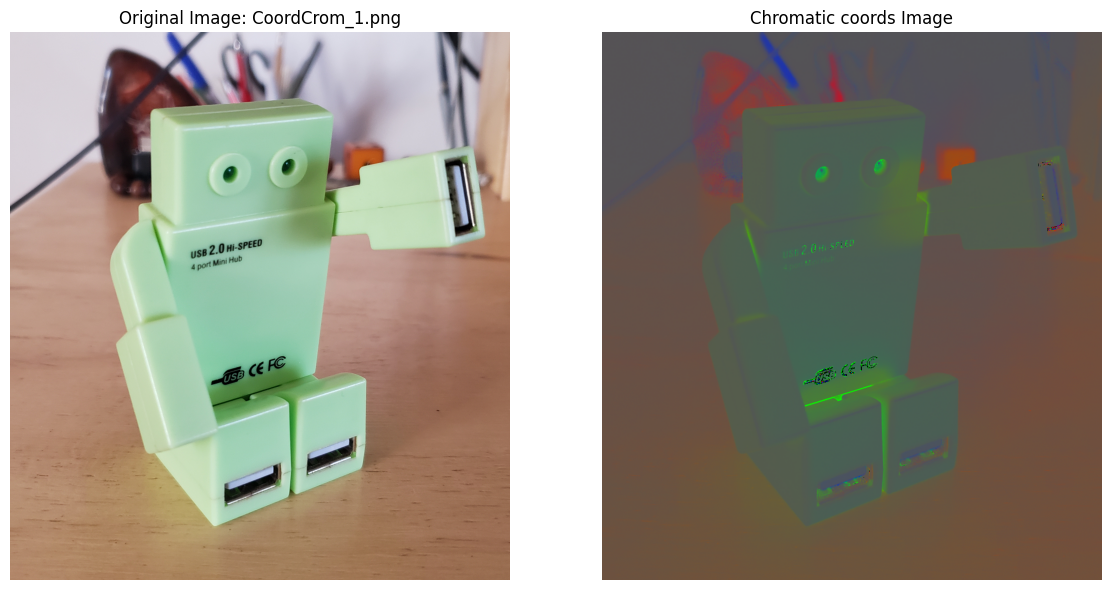

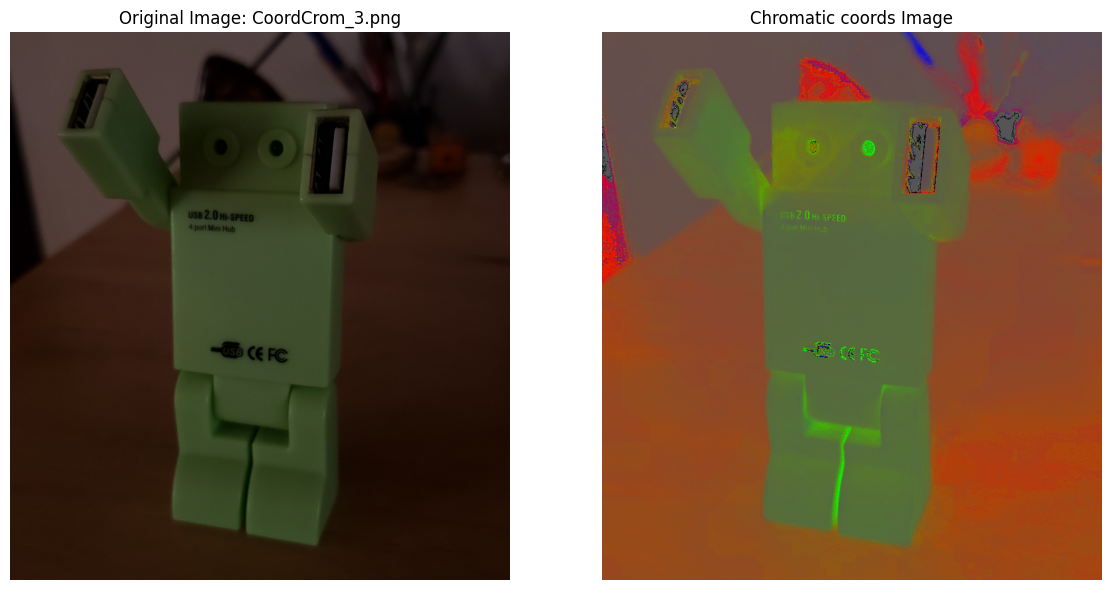

In [6]:
# Run on images

img_root_path = 'data/coord_cromaticas'
img_names_list = os.listdir(img_root_path)

for img_name in img_names_list:
    img_path = f"{img_root_path}/{img_name}"
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    img_chromatic = rgb_to_chromatic(img=img_rgb)

    axes[0].imshow(img_rgb)
    axes[0].set_title(f'Original Image: {img_name}')
    axes[0].axis('off')

    axes[1].imshow(img_chromatic)
    axes[1].set_title('Chromatic coords Image')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

#### Ejercicio 2

In [15]:
# Algoritmo white patch

def apply_white_patch(img_rgb: np.ndarray) -> np.ndarray:

    img_rgb = img_rgb.astype(np.float32)

    r_max = np.max(img_rgb[:, :, 0])
    g_max = np.max(img_rgb[:, :, 1])
    b_max = np.max(img_rgb[:, :, 2])

    # Normalize using max values

    img_rgb[:,:,0] = img_rgb[:,:,0] / r_max*0.9
    img_rgb[:,:,1] = img_rgb[:,:,1] / g_max*0.9
    img_rgb[:,:,2] = img_rgb[:,:,2] / b_max*0.9

    norm_image = np.clip(img_rgb, 0, 1)
    norm_image = (norm_image * 255).astype(np.uint8)

    return norm_image

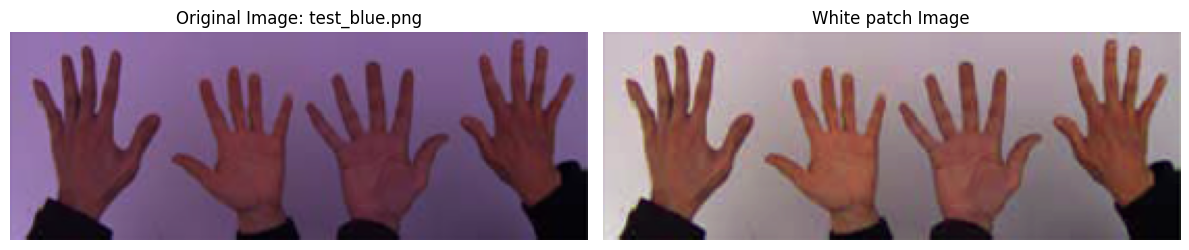

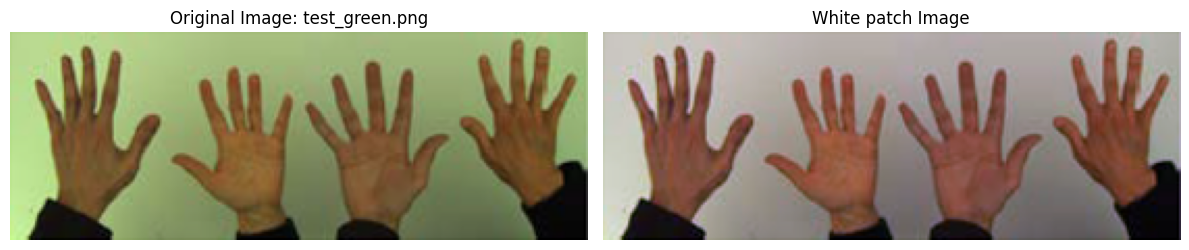

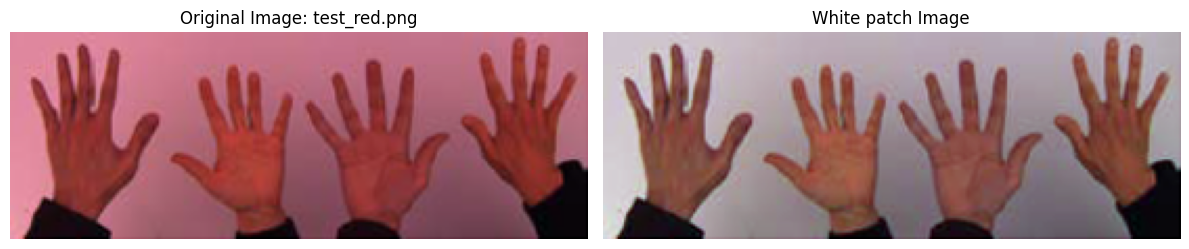

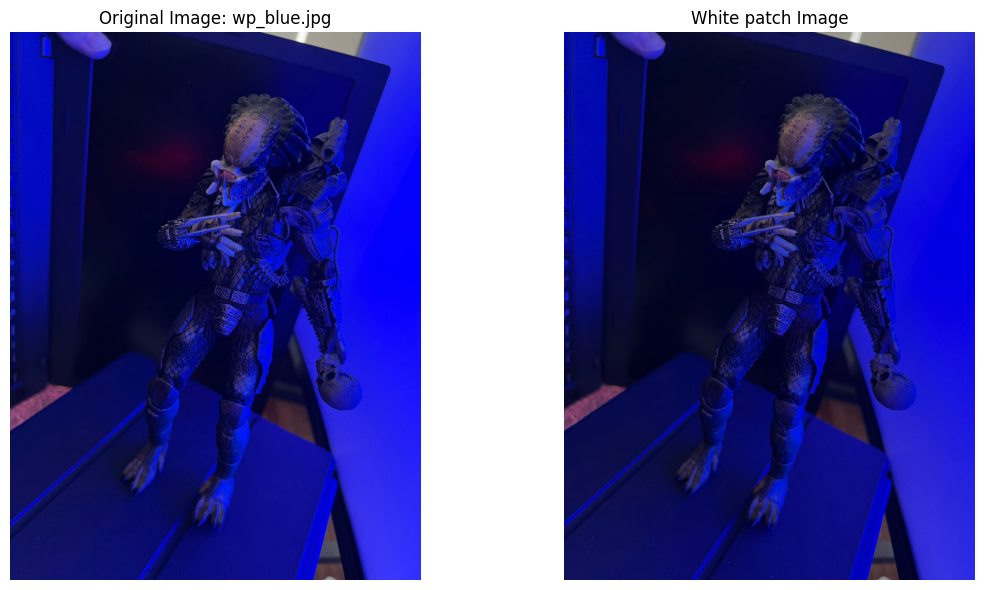

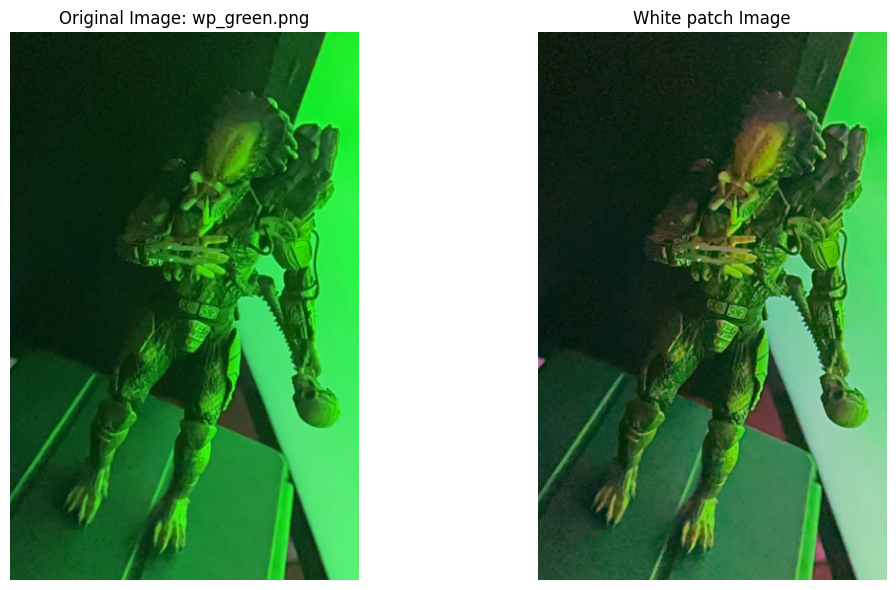

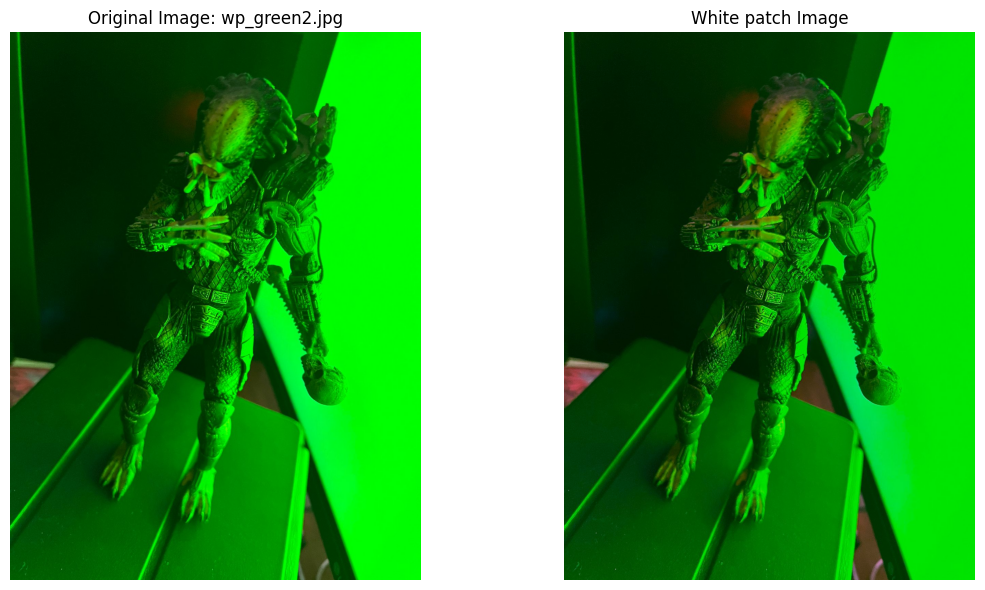

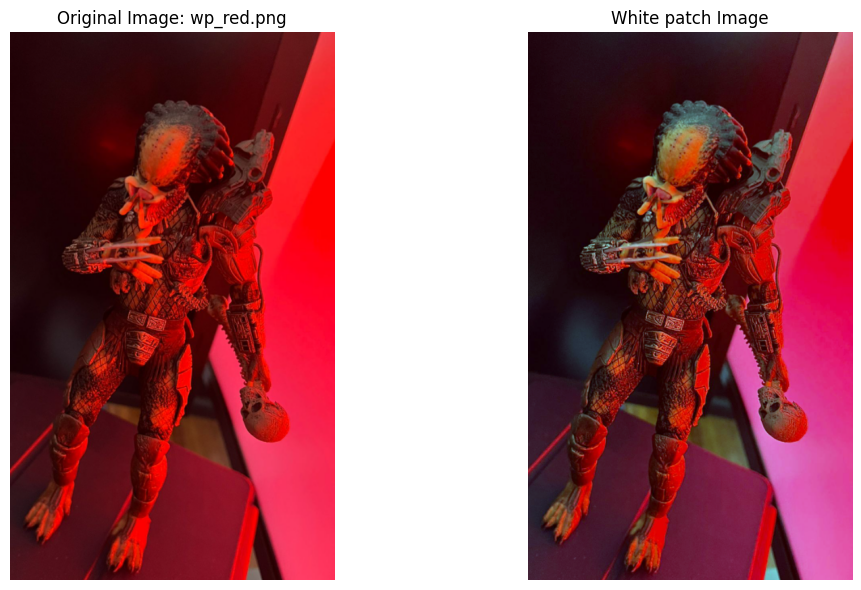

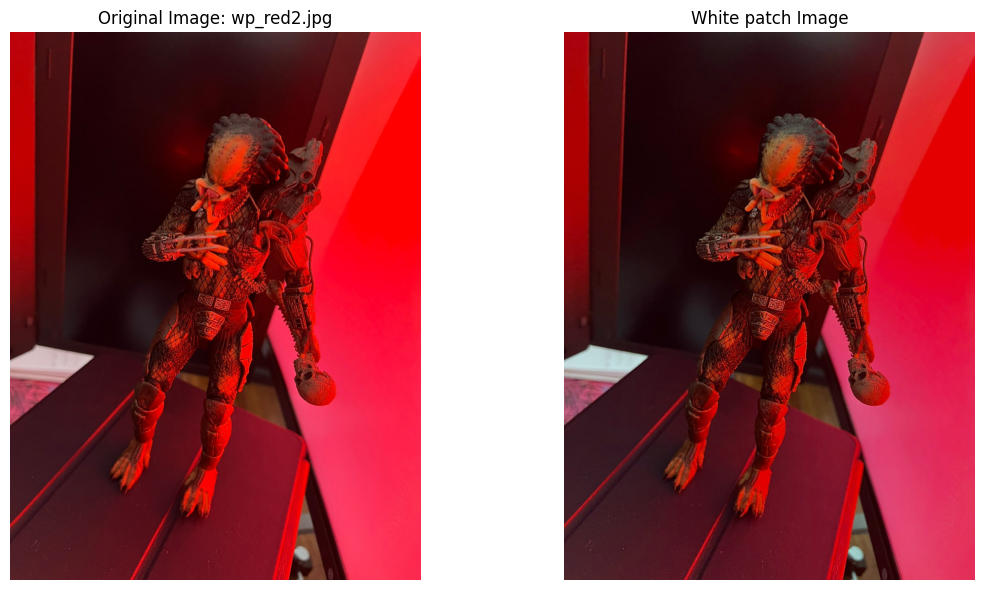

In [16]:
# Run white patch on images

img_root_path = 'data/white_patch'
img_names_list = sorted(os.listdir(img_root_path))

for img_name in img_names_list:
    img_path = f"{img_root_path}/{img_name}"
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    img_white_patch = apply_white_patch(img_rgb=img_rgb)

    axes[0].imshow(img_rgb)
    axes[0].set_title(f'Original Image: {img_name}')
    axes[0].axis('off')

    axes[1].imshow(img_white_patch)
    axes[1].set_title('White patch Image')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

El algoritmo de White patch no funciona de manera efectiva cuando los píxeles están sobreexpuestos, es decir, cuando tenemos valores muy altos o saturados en alguno de los canales RGB. En los casos analizados, se puede observar como el algoritmo funciona mejor cuando la luz de un determinado color es suave (test_green.png) que cuando la luz tiene una intensidad alta (wp_green2.png)

### Parte dos

#### Ejercicio 1

(-0.5, 286.5, 287.5, -0.5)

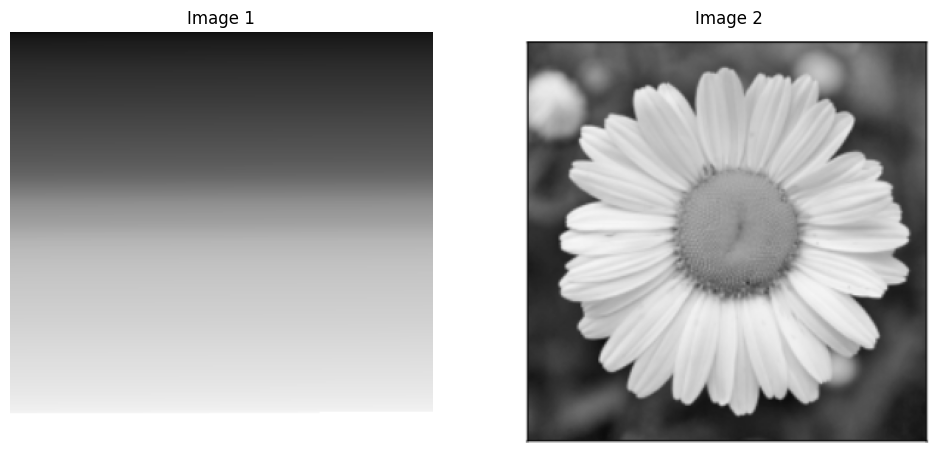

In [17]:
img1 = cv2.imread('data/img1_tp.png')
img2 = cv2.imread('data/img2_tp.png')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img1)
axes[0].set_title(f'Image 1')
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].set_title('Image 2')
axes[1].axis('off')

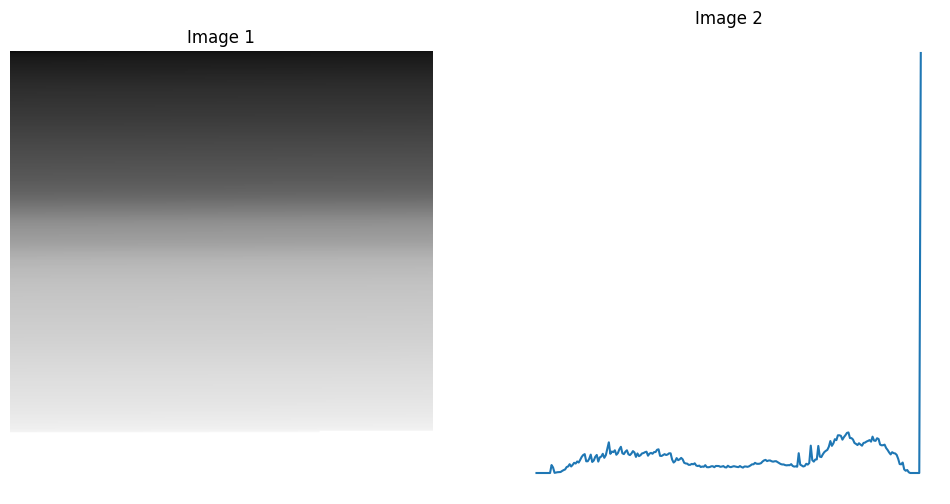

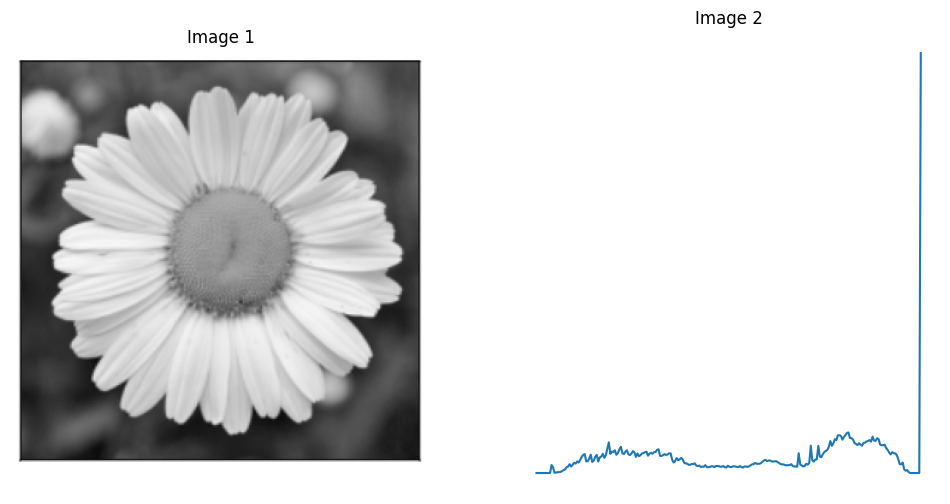

In [20]:


img_list = [img1, img2]
hist_list = [cv2.calcHist([img], [0], None, [256], [0, 256]) for img in img_list]

for idx, img in enumerate(img_list):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(img)
    axes[0].set_title(f'Image 1')
    axes[0].axis('off')

    axes[1].plot(hist_list[idx])
    axes[1].set_title('Image 2')
    axes[1].axis('off')

Se puede observar que, aunque las imagenes son distintas, sus histogramas son identicos y por ello los histogramas no resultan buenos features para un clasificador, ya que no es posible diferenciar las imagenes a partir de ellos. 